<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [30]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#df = pd.read_csv("salaries.csv")
df= pd.read_csv("C:/Users/User/Desktop/DSDJ/Examples/External/SLR/salaries.csv")

df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [7]:
# preparing the dependant & independant variables 

inputs= df.drop('salary_more_then_100k' ,axis='columns')
target= df['salary_more_then_100k']

In [10]:
inputs.head(2)

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters


In [11]:
target.head(2)

0    0
1    0
Name: salary_more_then_100k, dtype: int64

In [12]:

# as ML model working only on numbers ,will change the company ,degree & Jobs into numbers 
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()



In [13]:
# adding the new encoder to the input dataset 

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [14]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [16]:
# removing teh orignal columns from our input dataset 
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [17]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [18]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
from sklearn.model_selection import train_test_split
# splitting the data into test & train to avoid any overfitting issue 
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

model.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
model.score(inputs_n,target)

0.875

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [23]:
model.predict([[2,1,0]])

array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [24]:
model.predict([[2,1,1]])

array([1], dtype=int64)

In [28]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm



array([[1, 1],
       [1, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

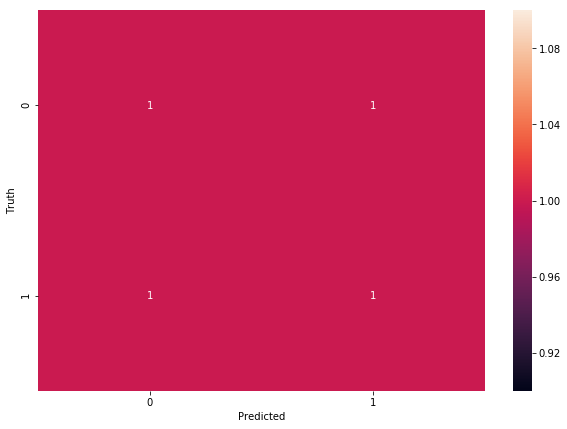

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')